In [16]:
import numpy as np
import pickle
import pylab
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline
MODEL = 'vggFace' #'caffeNet','vgg16' or 'faceSNN','vggFace'
saveFigPath = '/raid/linjieli/faceSimilarity/attractive/Result/'+MODEL
if not os.path.exists(saveFigPath):
    os.makedirs(saveFigPath)
with open('/raid/linjieli/faceSimilarity/attractive/atrr_imgIndex_name.pickle', 'rb') as handle:
    img_index_name = pickle.load(handle)
feature_PCA = np.loadtxt(saveFigPath+'/feature_pca_atrr.csv', delimiter=',')
#figure_Path = '/Users/Olivialinlin/Desktop/testAngel/starNow/'
img_name_List = []
img_path_List = []
for key in img_index_name.keys():
    for entry in img_index_name[key]:
        img_name_List.append(entry)
        #entry = figure_Path +entry
        img_path_List.append(entry)
pca_major_feature = [None]*4
img_path_pca = [None]*4
img_name_pca = [None]*4
for i in range(0,4):
    pca_major_feature[i] = np.array(feature_PCA[:,i])
    img_name_pca[i] = [x for y, x in sorted(zip(pca_major_feature[i],img_name_List ))]
    img_path_pca[i] = [x for y, x in sorted(zip(pca_major_feature[i],img_path_List ))]
    pca_major_feature[i].sort()
    print pca_major_feature[i][1:10],img_name_pca[i][1:10]

[-1.01404518 -0.98467508 -0.95753326 -0.94086763 -0.93718373 -0.93628953
 -0.91695831 -0.90067817 -0.86997952] ['/raid/linjieli/faceSimilarity/attractive/mit/males/i18.jpg', '/raid/linjieli/faceSimilarity/attractive/mit/males/i49.jpg', '/raid/linjieli/faceSimilarity/attractive/mit/males/i72.jpg', '/raid/linjieli/faceSimilarity/attractive/gs/males/C2_249.jpg', '/raid/linjieli/faceSimilarity/attractive/gs/males/C2_190.jpg', '/raid/linjieli/faceSimilarity/attractive/gs/males/C2_278.jpg', '/raid/linjieli/faceSimilarity/attractive/ngs/males/30M_NE_C.jpg', '/raid/linjieli/faceSimilarity/attractive/gs/females/C2_201.jpg', '/raid/linjieli/faceSimilarity/attractive/gs/females/C2_132.jpg']
[-1.80418055 -1.75110399 -1.57606609 -1.5728507  -1.5073066  -1.46641027
 -1.45739984 -1.42786102 -1.42323874] ['/raid/linjieli/faceSimilarity/attractive/ngs/females/BF08NES.jpg', '/raid/linjieli/faceSimilarity/attractive/ngs/males/AM01NES.jpg', '/raid/linjieli/faceSimilarity/attractive/ngs/females/00379_94042

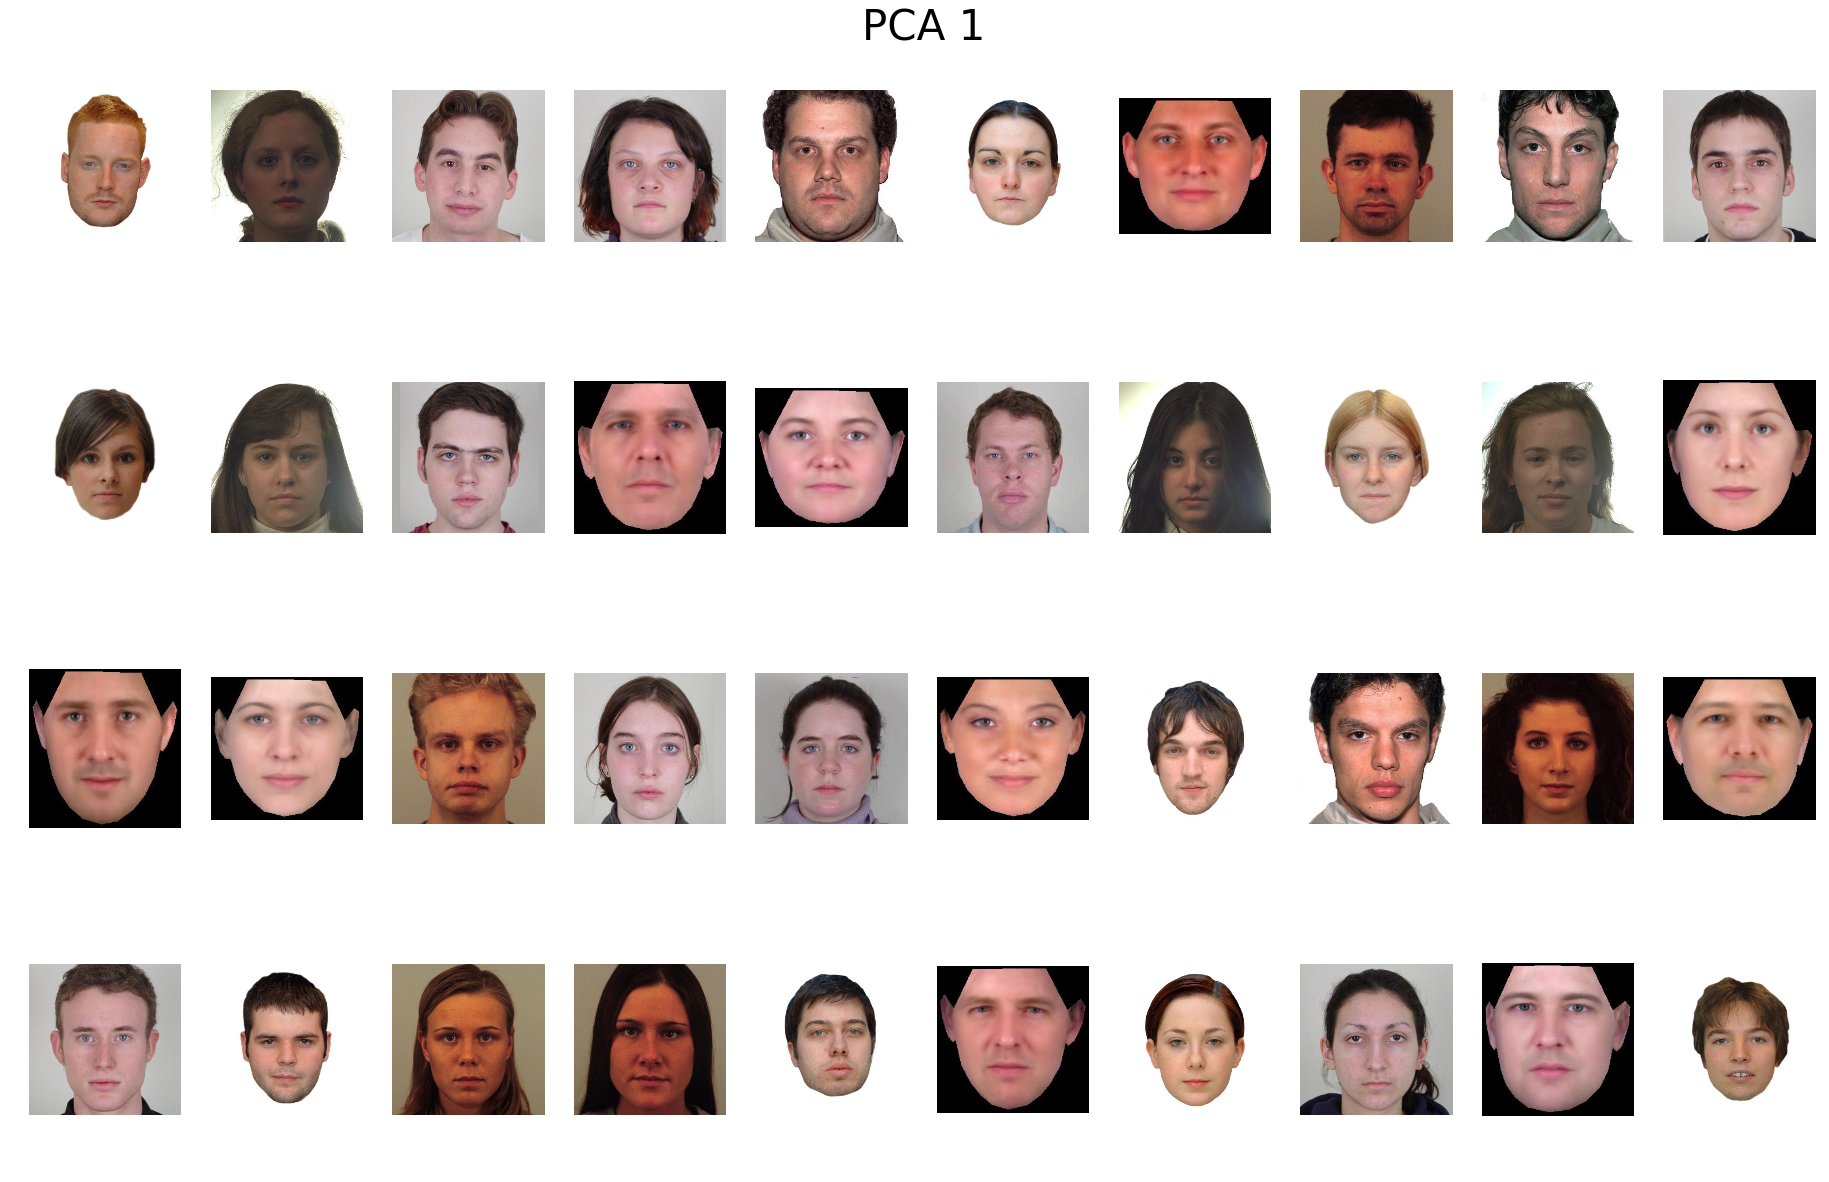

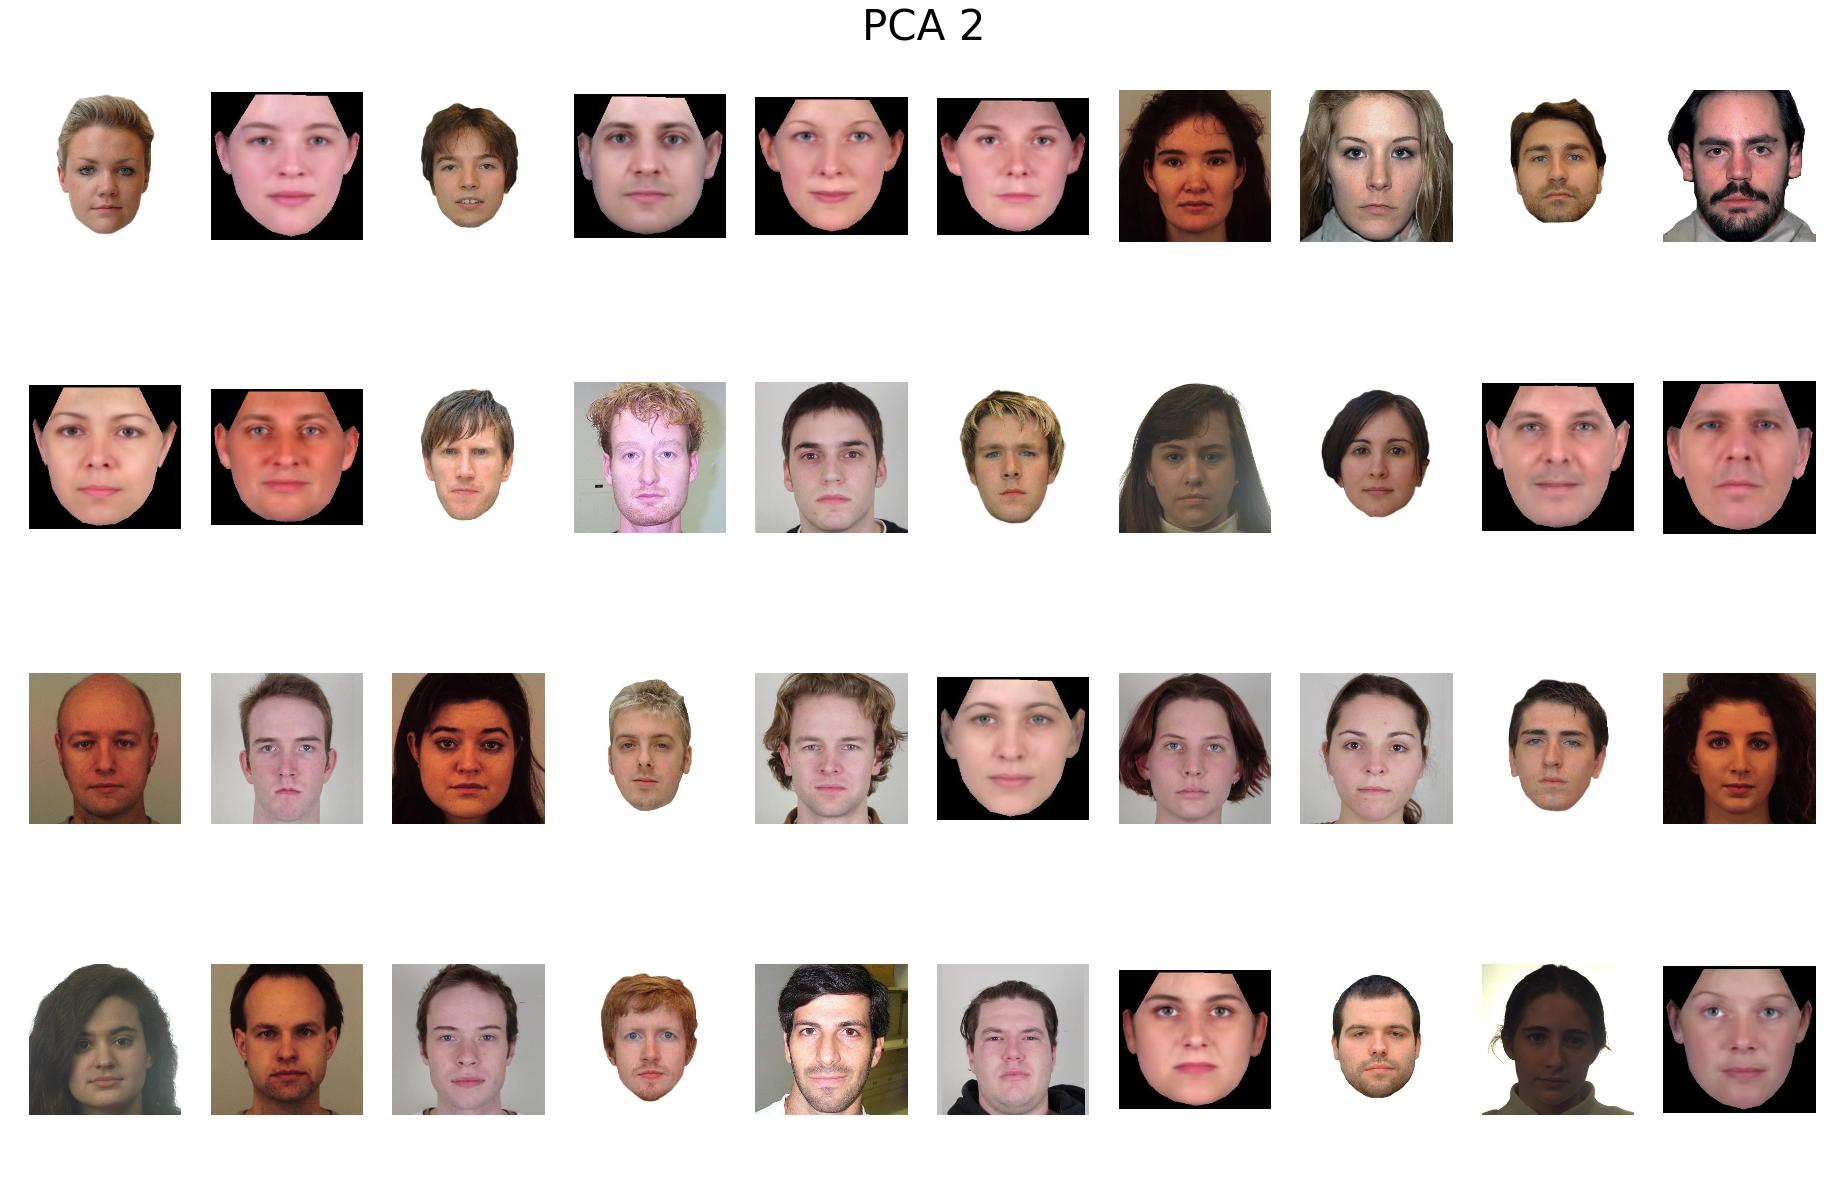

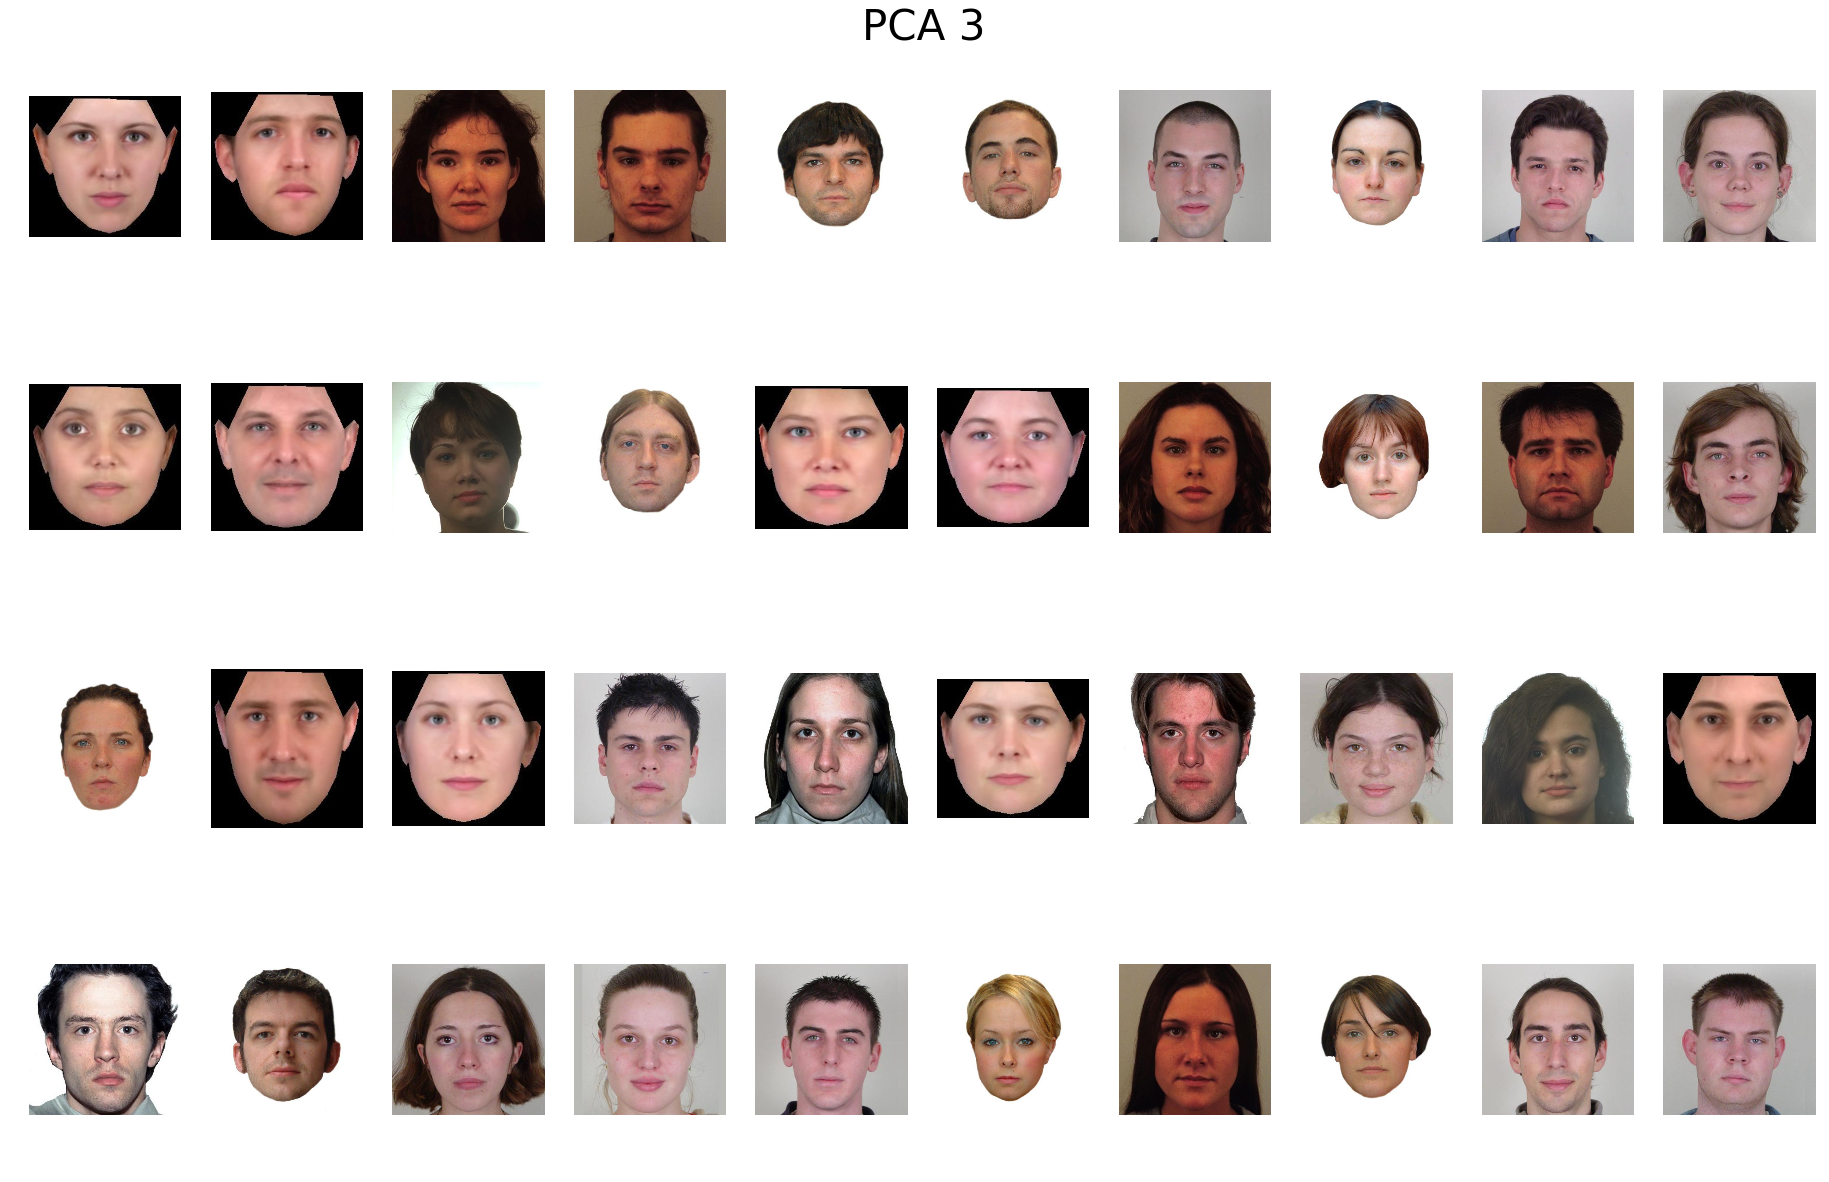

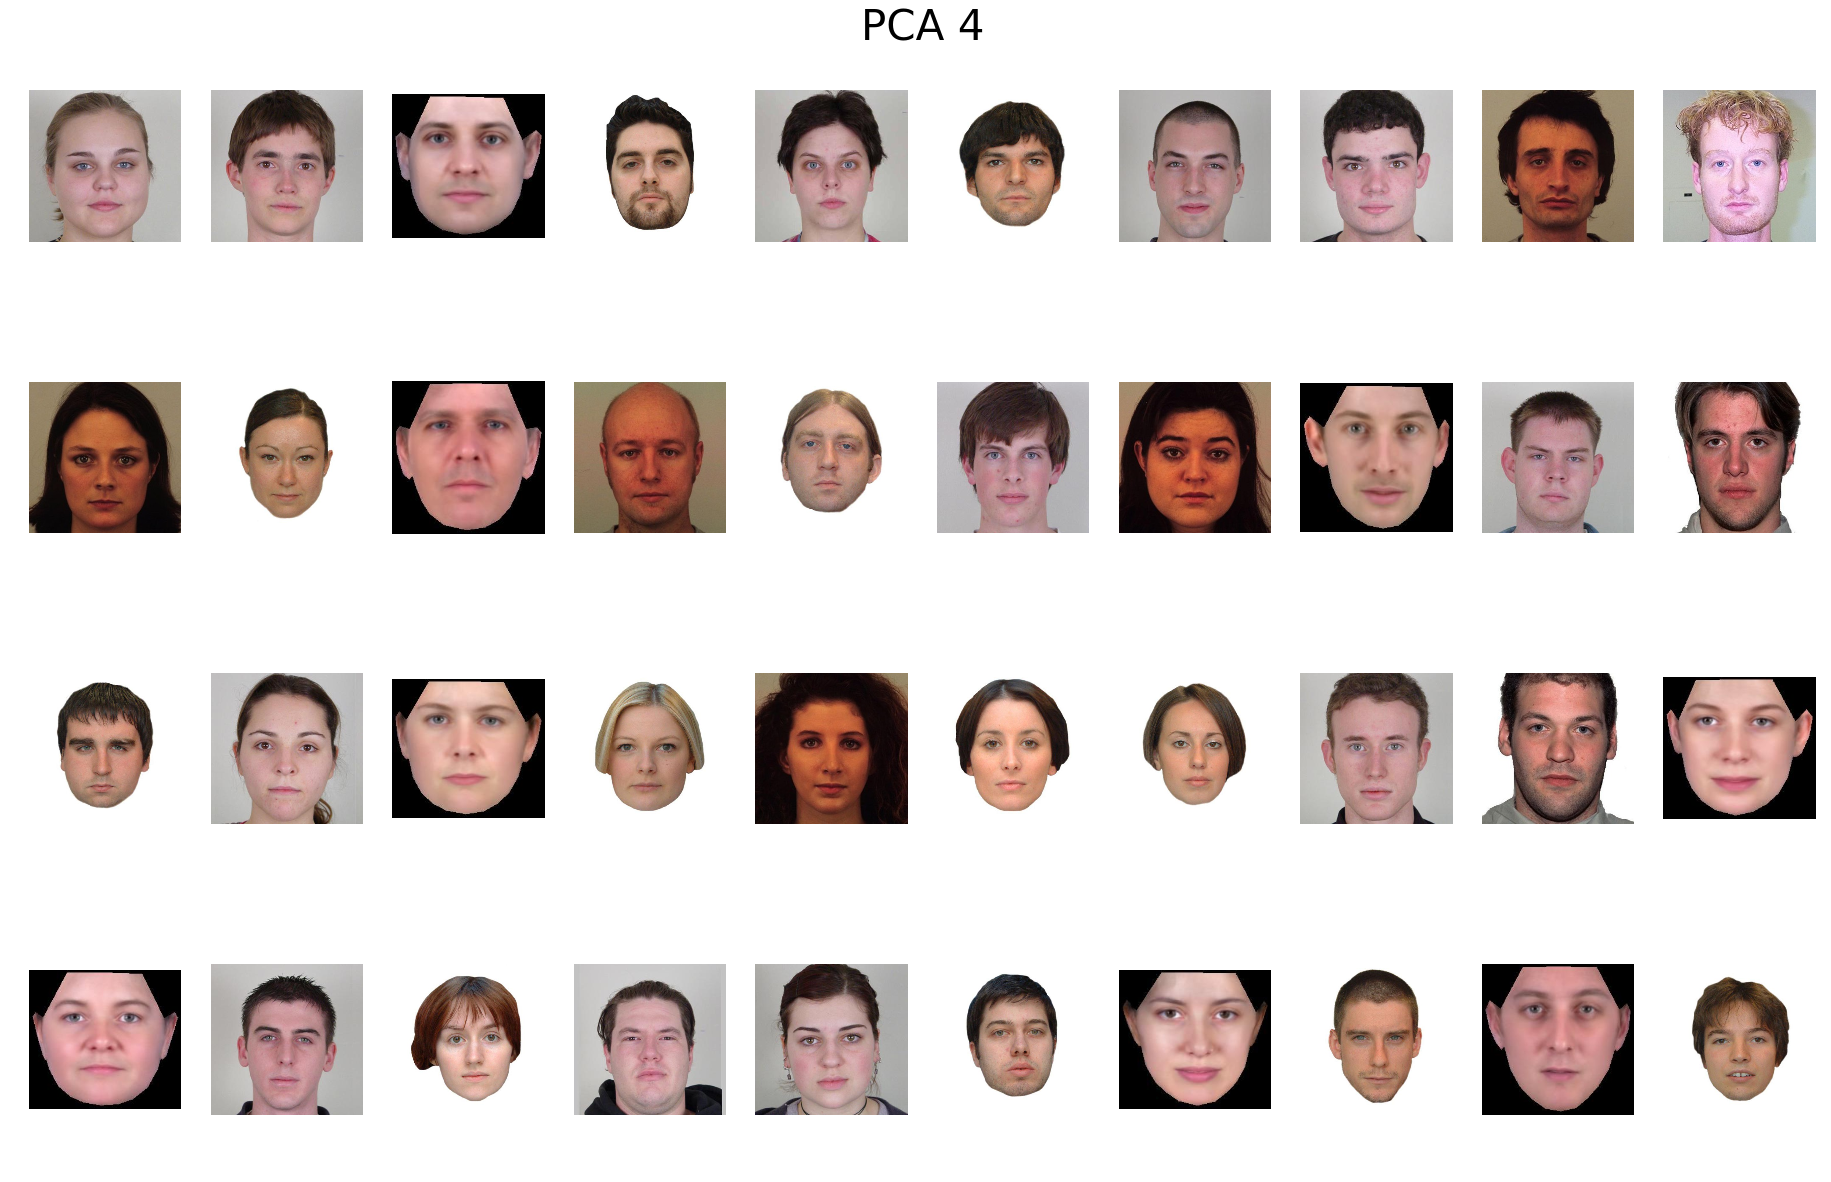

In [17]:
import math
for i in range(0,4): 
    plot_img = set(img_path_pca[i][::int(math.floor(float(len(img_path_pca[i]))/40))])
    f = pylab.figure(figsize = (32,20))
    pylab.title("PCA "+str(i+1),fontsize = 42)
    plt.axis('off')
    for n, fname in enumerate(plot_img):
        image=Image.open(fname)
        arr=np.asarray(image)
        f.add_subplot(math.floor(float(len(plot_img))/10), 10, n)  # this line outputs images on top of each other
        # f.add_subplot(1, 2, n)  # this line outputs images side-by-side
        pylab.imshow(arr)
        plt.axis('off')
    pylab.show()
    f.tight_layout()
    f.savefig(saveFigPath+"/"+MODEL+"_PCA"+str(i+1)+'.jpg', dpi=300)


